In [ ]:
import pandas as pd


dataframe=pd.read_csv("/content/Students_Performance.csv")
dataframe.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
dataframe['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [ ]:
dataframe["parental level of education"].unique()

array(['some high school', 'high school', 'some college',
       "associate's degree", "bachelor's degree", "master's degree"],
      dtype=object)

In [ ]:
parents = dataframe["parental level of education"].value_counts()
parents


some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [ ]:
maths_avg=dataframe["math score"].mean()
reading_avg=dataframe["reading score"].mean()
writing_avg=dataframe["writing score"].mean()
maths_avg

66.001

In [ ]:
maths=dataframe[dataframe["math score"]>maths_avg].shape[0]
maths

497

In [ ]:
reading=dataframe[dataframe["reading score"]>reading_avg].shape[0]
reading

516

In [ ]:
writing=dataframe[dataframe["writing score"]>writing_avg].shape[0]
writing



516

In [ ]:
dataframe.groupby('gender')['math score'].mean()

gender
female    63.376448
male      68.821577
Name: math score, dtype: float64

In [ ]:
dataframe.groupby('gender')['reading score'].mean()

gender
female    72.590734
male      65.545643
Name: reading score, dtype: float64

In [ ]:
dataframe.groupby('gender')['writing score'].mean()

gender
female    72.467181
male      63.446058
Name: writing score, dtype: float64

In [ ]:
dataframe.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [ ]:
dataframe.shape

(1000, 8)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

dataframe['test preparation course'] = le.fit_transform(dataframe['test preparation course'])
dataframe['test preparation course'].value_counts()

1    642
0    358
Name: test preparation course, dtype: int64

In [ ]:
dataframe['parental level of education'] = le.fit_transform(dataframe['parental level of education'])
dataframe['parental level of education'].value_counts()

4    226
0    222
2    196
5    179
1    118
3     59
Name: parental level of education, dtype: int64

In [ ]:
dataframe['gender'] = le.fit_transform(dataframe['gender'])
dataframe['gender'].value_counts()

0    518
1    482
Name: gender, dtype: int64

In [ ]:
dataframe['math score'] = le.fit_transform(dataframe['math score'])
dataframe['math score'].value_counts()

49    36
46    34
43    32
53    30
58    28
      ..
2      1
4      1
11     1
12     1
0      1
Name: math score, Length: 85, dtype: int64

In [ ]:
dataframe['reading score'] = le.fit_transform(dataframe['reading score'])
dataframe['reading score'].value_counts()

44    35
46    32
36    32
45    30
39    30
      ..
12     1
1      1
3      1
4      1
0      1
Name: reading score, Length: 72, dtype: int64

In [ ]:
dataframe['writing score'] = le.fit_transform(dataframe['writing score'])
dataframe['writing score'].value_counts()

50    36
46    32
49    30
44    30
38    27
      ..
2      1
4      1
7      1
6      1
11     1
Name: writing score, Length: 77, dtype: int64

In [ ]:
dataframe.groupby(['gender']).agg(['min','median','max'])

<ipython-input-32-cb0edbbfd9a8>:1: FutureWarning: ['race/ethnicity', 'lunch'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  dataframe.groupby(['gender']).agg(['min','median','max'])


parental level of education            test preparation course         \
                               min median max                     min median   
gender                                                                         
0                                0    2.0   5                       0    1.0   
1                                0    2.0   5                       0    1.0   

           math score            reading score            writing score  \
       max        min median max           min median max           min   
gender                                                                    
0        1          0   49.0  84             0   45.0  71             0   
1        1         11   53.0  84             1   38.0  71             1   

                   
       median max  
gender             
0        50.0  76  
1        40.0  76

In [ ]:
dataframe[['lunch','gender','math score','writing score','reading score']].groupby(['gender','lunch']).agg('median')


math score  writing score  reading score
gender lunch                                                 
0      free/reduced        41.0           44.0           39.0
       standard            51.0           52.0           47.0
1      free/reduced        46.0           35.0           33.5
       standard            56.0           43.0           40.0

In [ ]:
dataframe[['test preparation course',
      'gender',
      'math score',
      'writing score',
      'reading score']].groupby(['test preparation course','gender']).agg('median')


math score  writing score  reading score
test preparation course gender                                          
0                       0             51.0           55.0           50.0
                        1             58.0           47.0           44.0
1                       0             46.0           46.0           43.0
                        1             51.0           36.0           35.0

In [ ]:
import math
stdevm = dataframe['math score'].std()
print("standard deviation of math score is",stdevm)
stdevr = dataframe['reading score'].std()
print("standard deviation of reading score is",stdevr)
stdevw = dataframe['writing score'].std()
print("standard deviation of writing score is",stdevw)

standard deviation of math score is 15.423781768556116
standard deviation of reading score is 14.473577977109166
standard deviation of writing score is 15.074072663572599


In [ ]:
dataframe.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


Case Study on Testing of HypothesisCase Study on Testing of Hypothesis

In [36]:
import pandas as pd


dataframe=pd.read_csv("/content/Sales_add.csv")
dataframe.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [37]:
dataframe_clean = dataframe.copy()

dataframe_clean.dropna(axis=0, inplace=True)

dataframe_clean.head()


,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [38]:
(dataframe_clean.isnull().sum()/ dataframe_clean.shape[0]).sort_values(ascending=False)

Month                             0.0
Region                            0.0
Manager                           0.0
Sales_before_digital_add(in $)    0.0
Sales_After_digital_add(in $)     0.0
dtype: float64

In [39]:
dataframe_clean.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


In [20]:
missing = dataframe.isnull().sum()
missing.sort_values(ascending=False)

Month                             0
Region                            0
Manager                           0
Sales_before_digital_add(in $)    0
Sales_After_digital_add(in $)     0
dtype: int64

In [21]:
dataframe.dropna().head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


array([[<Axes: title={'center': 'Sales_before_digital_add(in $)'}>,
        <Axes: title={'center': 'Sales_After_digital_add(in $)'}>]],
      dtype=object)

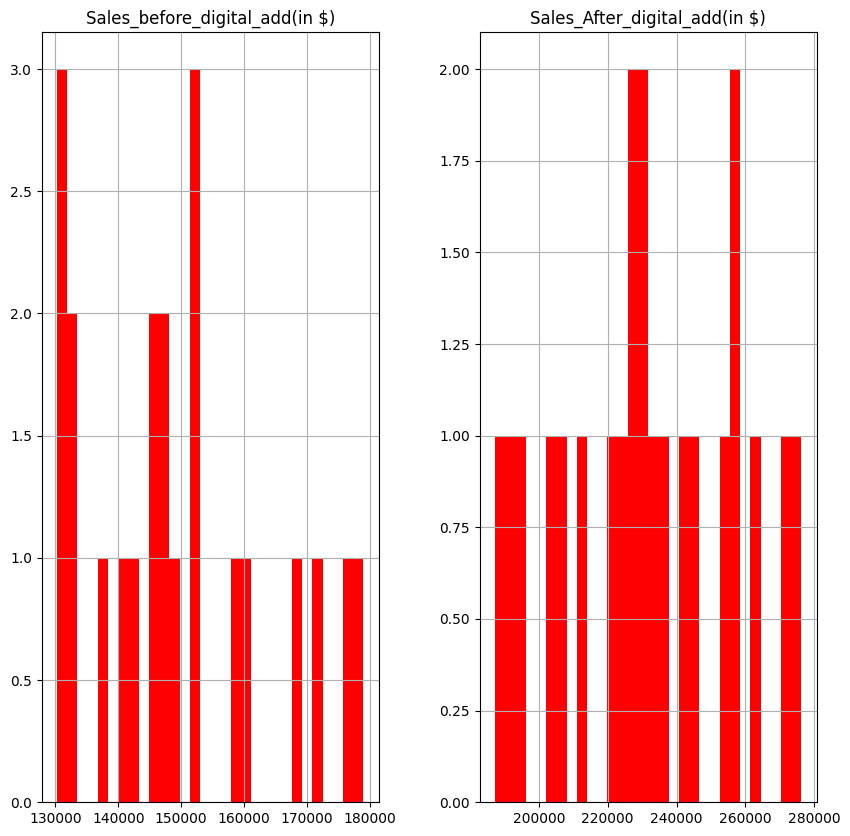

In [46]:
dataframe.hist(bins = 30, figsize = (10,10), color = 'r')

In [49]:
dataframe['Manager'].max()

'Manager - C'

In [50]:
dataframe['Region'].max()

'Region - C'

In [51]:
dataframe['Manager'].min()

'Manager - A'

In [52]:
dataframe['Region'].min()

'Region - A'